# MNIST Handwritten Digits Data


In [63]:
import numpy as np
import gzip
import urllib.request

# URLs from a working mirror (Google storage)
base_url = "https://storage.googleapis.com/cvdf-datasets/mnist/"
files = {
    "train_images": "train-images-idx3-ubyte.gz",
    "train_labels": "train-labels-idx1-ubyte.gz",
    "test_images": "t10k-images-idx3-ubyte.gz",
    "test_labels": "t10k-labels-idx1-ubyte.gz"
}

# Download the files
for name, fname in files.items():
    print(f"Downloading {fname}...")
    urllib.request.urlretrieve(base_url + fname, fname)

# Load function for IDX files
def load_images(fname):
    with gzip.open(fname, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 28*28)

def load_labels(fname):
    with gzip.open(fname, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# Load datasets
X_train = load_images("train-images-idx3-ubyte.gz")
y_train = load_labels("train-labels-idx1-ubyte.gz")
X_test = load_images("t10k-images-idx3-ubyte.gz")
y_test = load_labels("t10k-labels-idx1-ubyte.gz")

# Final structure similar to fetch_openml
mnist = {
    'data': np.vstack((X_train, X_test)),
    'target': np.hstack((y_train, y_test))
}

print(mnist.keys())


dict_keys(['data', 'target'])


In [64]:
type(mnist)

dict

In [65]:
# print(mnist['DESCR'])

In [66]:
X=mnist['data']
y=mnist['target']

In [67]:
X.shape

(70000, 784)

In [68]:
y.shape

(70000,)

In [69]:
X[0][:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [70]:
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)

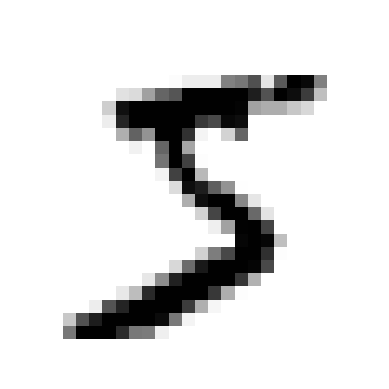

In [71]:
from matplotlib import pyplot as plt
plt.imshow(some_digit_image,cmap='binary',interpolation='nearest')
plt.axis('off')
plt.show()

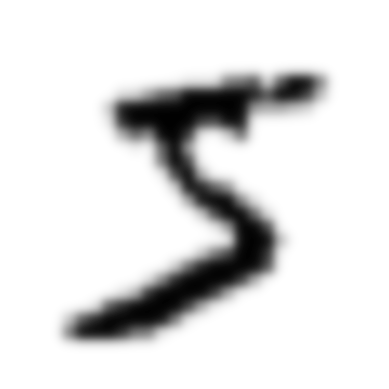

In [72]:
plt.imshow(some_digit_image,interpolation='gaussian',cmap='binary')
plt.axis('off')
plt.show()

In [73]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [74]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [75]:
y_train=y_train.astype(np.uint8)
y_test=y_test.astype(np.uint8)

In [76]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Binary Classification

In [77]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [78]:
y_train_5[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [79]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# SGD Classifier

In [80]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42)
sgd.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [81]:
sgd.predict([some_digit])

array([ True])

In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X_train,y_train_5,cv=3,scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [83]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [84]:
cross_val_score(sgd,X_train_scaled,y_train_5,cv=3,scoring='accuracy')

array([0.9748, 0.9657, 0.9692])

#  Custom Cross-Validation

In [85]:
def cross_val_score(model,X,y,scoring='accuracy',cv=3):
  from sklearn.model_selection import StratifiedKFold
  skfolds=StratifiedKFold(cv)
  from sklearn.base import clone
  scores=[]
  for train_index,test_index in skfolds.split(X,y):
    clone_model=clone(model)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_fold=X[test_index]
    y_test_fold=y[test_index]
    clone_model.fit(X_train_folds,y_train_folds)
    y_pred=clone_model.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    scores.append(n_correct/len(y_pred))
  return scores

In [86]:
cross_val_score(sgd,X_train,y_train_5,scoring='accuracy',cv=3)

[np.float64(0.95035), np.float64(0.96035), np.float64(0.9604)]

In [87]:
def cross_val_score(model,X,y,scoring='accuracy',cv=3):
  from sklearn.model_selection import StratifiedKFold
  skfolds= StratifiedKFold(cv)
  from sklearn.base import clone
  scores=[]
  for train_index,test_index in skfolds.split(X,y):
    clone_model=clone(model)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_fold=X[test_index]
    y_test_fold=y[test_index]
    X_train_scaled_folds=X_train_folds/255
    X_test_scaled_fold=X_test_fold/255
    clone_model.fit( X_train_scaled_folds,y_train_folds)
    y_pred=clone_model.predict(X_test_scaled_fold)
    n_correct=sum(y_pred==y_test_fold)
    scores.append(n_correct/len(y_pred))
  return scores

In [88]:
cross_val_score(sgd,X_train,y_train_5,scoring='accuracy',cv=3)

[np.float64(0.9748), np.float64(0.9657), np.float64(0.9692)]

# Other Performance Metrics
## 1. Confusion Matrix
## 2. Precision
## 3. Recall
## 4. F1 Score
## 5. ROC Score
## 6. ROC AUC Curve

In [89]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd,X_train_scaled,y_train_5,cv=3)
confusion_matrix(y_train_5,y_train_pred)

array([[53613,   966],
       [  840,  4581]])

In [90]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8258518117901569
0.8450470392916436


In [91]:
manual_precision_score=(4581/(4581+966))
print(manual_precision_score)

0.8258518117901569


In [92]:
manual_recall_score=(4581/(4581+840))
print(manual_recall_score)

0.8450470392916436


In [93]:
print(f1_score(y_train_5,y_train_pred))

0.8353391684901532


# Decision Function

In [94]:
sgd.decision_function([some_digit])

array([2164.22030239])

In [95]:
sgd.decision_function([some_digit]) > 0

array([ True])

In [96]:
threshold=8000
sgd.decision_function([some_digit]) > threshold

array([False])

In [97]:
y_scores=cross_val_predict(sgd,X_train_scaled,y_train_5,cv=3,method='decision_function')

In [98]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

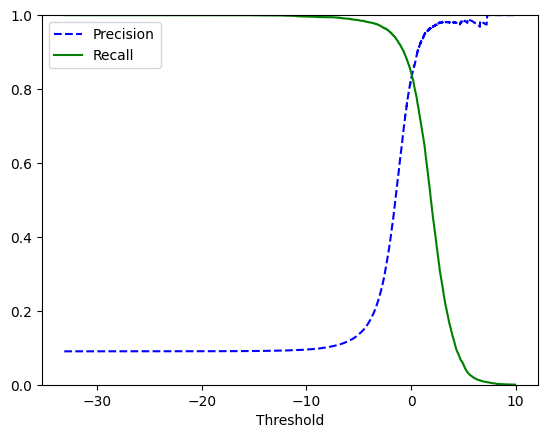

In [99]:
from matplotlib import pyplot as plt
plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [100]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [101]:
precisions > 0.9

array([False, False, False, ...,  True,  True,  True])

In [102]:
np.argmax(precisions >= 0.9)

np.int64(55404)

In [103]:
threshold_90_precision=thresholds[np.argmax(precisions >= 0.9)]
threshold_90_precision

np.float64(0.6060137354660038)

In [104]:
precisions[np.argmax(precisions > 0.9)]

np.float64(0.9001305483028721)

In [105]:
y_preds= y_scores >= threshold_90_precision

In [106]:
precision_score(y_train_5,y_preds)

0.9001305483028721

In [107]:
recalls[np.argmax(precisions >= 0.9)]

np.float64(0.7631433314886552)

In [108]:
np.argmin(recalls >= 0.9)-1

np.int64(53004)

In [109]:
thresholds_90_recall=thresholds[np.argmin(recalls >= 0.9)-1]
thresholds_90_recall

np.float64(-0.6864881115297083)

In [110]:
recalls[np.argmin(recalls >= 0.9)-1]

np.float64(0.9000184467810367)

In [111]:
y_preds_1= y_scores >= thresholds_90_recall
print(recall_score(y_train_5,y_preds_1))
print(precision_score(y_train_5,y_preds_1))

0.9000184467810367
0.6973985134362493


# ROC Curve

In [112]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

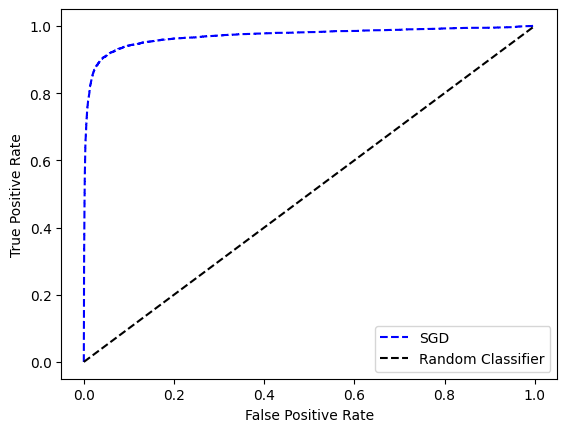

In [113]:
plt.plot(fpr,tpr,'b--',label='SGD')
plt.plot([0,1],[0,1],'k--',label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

In [114]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

np.float64(0.9704522882419195)

In [115]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=42)
y_probas=cross_val_predict(forest,X_train_scaled,y_train_5,cv=3,method='predict_proba')
y_probas[:5]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [116]:
y_scores_forest=y_probas[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

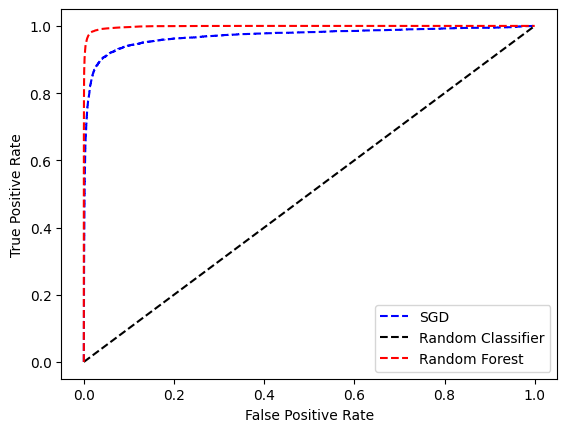

In [117]:
plt.plot(fpr,tpr,'b--',label='SGD')
plt.plot([0,1],[0,1],'k--',label='Random Classifier')
plt.plot(fpr_forest,tpr_forest,'r--',label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

In [118]:
roc_auc_score(y_train_5,y_scores_forest)

np.float64(0.9983400347444625)

# MultiOutput Binary

In [119]:
y_odd=y_train % 2
y_large=y_train >= 7
y_combined=np.c_[y_odd,y_large]

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_combined)

KNeighborsClassifier()

In [121]:
knn.predict([some_digit])

array([[1, 0]], dtype=uint8)